In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.io.wavfile import write
from scipy.io.wavfile import read
import IPython

# Simplified Reverb System using Filter Functions

In [2]:
#allpass filter coefficients:
#b: [-Lambda,...(delay)...,1]
#a: [1,...(delay)...,-Lambda]

#comb filter coefficients:
#b: [1]
#a: [1,...(delay)...,-gain]

def allpassCoef(k, delay):
    b = np.zeros(delay+1)
    b[0] = -k
    b[-1] = 1
    a = np.zeros(delay+1)
    a[0] = 1
    a[-1] = -k
    return b, a

def combCoef(gain, delay):
    b = [1]
    a = np.zeros(delay+1)
    a[0] = 1
    a[-1] = -gain
    return b, a

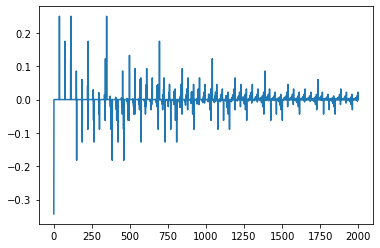

In [3]:
samplerate = 44100

#generate allpass filter coefficients
b1,a1 = allpassCoef(.7, 347)
b2,a2 = allpassCoef(.7, 113)
b3,a3 = allpassCoef(.7, 37)

#test using impulse
x = np.zeros(2000)
x[0] = 1

#apply allpass filter to the impulse
y = signal.lfilter(b1, a1, x)
y = signal.lfilter(b2, a2, y)
y = signal.lfilter(b3, a3, y)
plt.plot(y)
plt.show()

In [4]:
write('impulseAllpass.wav', samplerate, y.astype(np.float32))
IPython.display.Audio('impulseAllpass.wav')

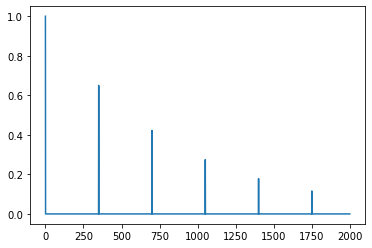

In [5]:
#generate comb filter coefficients
b1,a1 = combCoef(.65, 350)

#test using impulse
x = np.zeros(2000)
x[0] = 1

#apply allpass filter to the impulse
y = signal.lfilter(b1, a1, x)
plt.plot(y)
plt.show()

In [6]:
write('impulseComb.wav', samplerate, y.astype(np.float32))
IPython.display.Audio('impulseComb.wav')

# Concise Reverb Function

In [7]:
def reverb(x):
    b1,a1 = allpassCoef(.7, 347)
    b2,a2 = allpassCoef(.7, 113)
    b3,a3 = allpassCoef(.7, 37)
    y = signal.lfilter(b1, a1, x)
    y = signal.lfilter(b2, a2, y)
    y = signal.lfilter(b3, a3, y)
    
    b1,a1 = combCoef(.773, 1687)
    b2,a2 = combCoef(.802, 1601)
    b3,a3 = combCoef(.753, 2053)
    b4,a4 = combCoef(.733, 2251)
    y1 = signal.lfilter(b1, a1, y)
    y2 = signal.lfilter(b2, a2, y)
    y3 = signal.lfilter(b3, a3, y)
    y4 = signal.lfilter(b4, a4, y)
    y = y1 + y2 + y3 + y4
    return y

# Apply Reverb to other Sound Files

C:\Users\Alex\AppData\Local\Temp/ipykernel_7332/2679920315.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, x = read(file+'.wav')


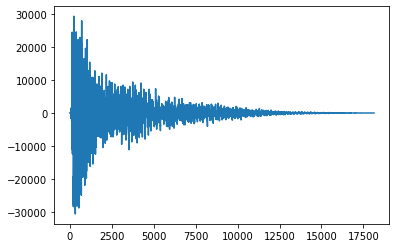

In [8]:
#load sound file
file = 'snare'
samplerate, x = read(file+'.wav')
x = x[:,0] #for multi-channel files, make single channel
plt.plot(x)
IPython.display.Audio(file+'.wav')

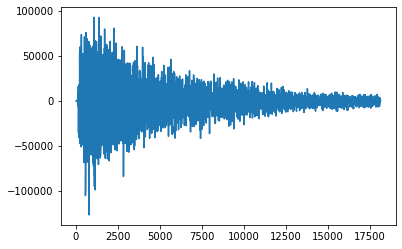

In [9]:
#apply mixing
y = reverb(x)
plt.plot(y)

In [10]:
write(file+'Combined.wav', samplerate, y.astype(np.int16))
IPython.display.Audio(file+'Combined.wav')